In [1]:
#We will use logistic regression to perform classifcation 
#of a data set, here we will focus in binary classification(1 or 0)

In [2]:
#Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Math
import math as mt

#Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Machine learing imports 
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import train_test_split

#For evaluating machine learning results
from sklearn import metrics

#Dataset import
import statistics as st
import statsmodels.api as sm

In [3]:
#About logistic funcion

#First, let's take a look at the Logistic Function. 
#The logistic function can take an input from negative to positive infinity and it has always has an output between 0 and 1


Text(0.5, 1.0, 'Logistic Function')

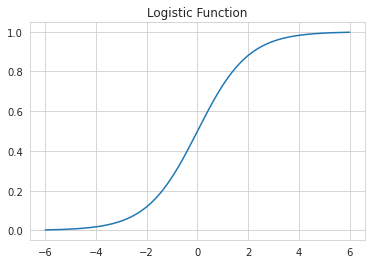

In [4]:
#Logistic function
def logistic(t):
    return 1.0/(1 + mt.exp((-1.0)*t))

#Setting t from -6 to 6(500 elements)
t = np.linspace(-6,6,500)

#Set up values
y = np.array([logistic(ele) for ele in t])

#plot
plt.plot(t,y)
plt.title('Logistic Function')

In [5]:
#This Data is from 1974 bt Redbook Magazine.
#They asked if married women had extramarital affairs.
# We will try classificate the married women in:
#Had ou hadn't an affair. 


In [6]:
#Step One: getting the data
df = sm.datasets.fair.load_pandas().data

In [7]:
#Looking the data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [8]:
#Now we will create a new column "had_affair"
#Had_affair = 0 if the woman didn't have an affair
#had_affair =1 if the woman had an affair
#We will using the column 'affairs'

In [9]:
#Creating the function
def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0

#apply to the dataframe
df['had_affair'] = df['affairs'].apply(affair_check)

In [10]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [11]:
#It's time to groupby our information through the new column
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


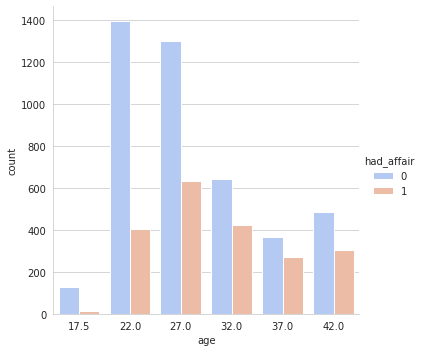

In [12]:
#Let's visualize the data
sns.catplot('age',data=df,hue='had_affair',palette='coolwarm',kind='count')

In [13]:
#About age, we can se that age increase a probability of to have an affair


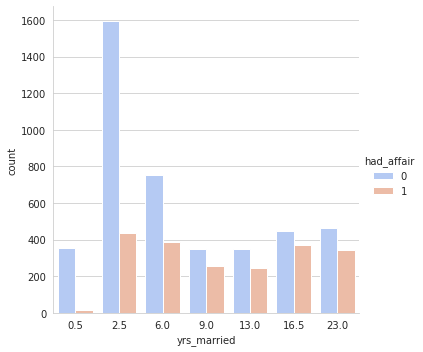

In [14]:
sns.catplot('yrs_married',data=df,hue='had_affair',palette='coolwarm',kind='count')

In [15]:
#the probability of having an affair increases with the number of the years married

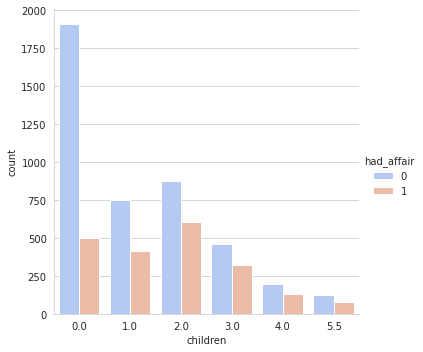

In [16]:
sns.catplot('children',data=df,hue='had_affair',palette='coolwarm',kind='count')

In [17]:
#The graphics suggests that less children results in more probability of having an affair

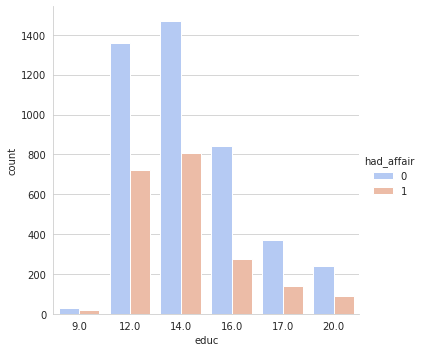

In [18]:
sns.catplot('educ',data=df,hue='had_affair',palette='coolwarm',kind='count')

In [19]:
#More education decrease the probability of having an affair

In [20]:
#Step two: Now we will do this with logistic regression

In [21]:
#Reorganizing the categorical variables 
#This means take the Occupation and Husband's Occupation and change the name of the professions for numbers and them atribute values 0 or 1

In [22]:
#Create new Data Frames for the categorigal variables
occ = pd.get_dummies(df['occupation'])
hus_occ = pd.get_dummies(df['occupation_husb'])

#Looking the result
occ.head()


,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [23]:
#Let's give names for the new DataFrames
occ.columns =['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ.columns =['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']


In [24]:
df_occ = pd.DataFrame(occ)
df_hus_occ = pd.DataFrame(hus_occ)
df.shape

(6366, 10)

In [25]:
#Set X as a new DataFrame without the occupation columns or the Y target
X =df.drop(['occupation','occupation_husb','had_affair'],axis=1)
X.shape

(6366, 7)

In [26]:
#Concat the self made dataframes together
dummies = pd.concat([df_occ,df_hus_occ],axis=1)
dummies.shape

(6366, 12)

In [27]:
X.shape

(6366, 7)

In [28]:
#Now Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)
#result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [29]:
#Now let's set up Y
Y =df.had_affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

In [30]:
#Step three: Multicollinearity Consideration

In [31]:
#Now we will avoid multicollinearity dropping the 
#dummies variables, because they are highly correlated.
#Doing this we are saving our model from to be destorced


In [32]:
#Dropping one column of each dummy variable set
X = X.drop('occ1',axis =1)
X = X.drop('hocc1',axis =1)

#Drop affairs column so Y target makes sense
X = X.drop('affairs',axis=1)

#show
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [33]:
#For Scikit Learn we need a 1-D array, but our Y is not one.

In [34]:
#Trasforming the array in a flatten one
Y = np.ravel(Y)

#show
Y

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
#Step four: Finally the logistic regression

In [36]:
#Creating the Logistic Regression model
log_model = LogisticRegression()

#Fit the data
log_model.fit(X,Y)

#Check our accuracy
log_model.score(X,Y)

/home/ana/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7265158655356582

In [37]:
#Checking percentage of women that had affairs
Y.mean()

0.3224945020420987

In [38]:
#Bringing the coeficients from de model
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [39]:
coeff_df

,0,1
0,rate_marriage,[-0.7071302288195844]
1,age,[-0.05294539416094079]
2,yrs_married,[0.09891570390915969]
3,children,[0.019154947023944744]
4,religious,[-0.366363896243067]
5,educ,[0.01607717631277386]
6,occ2,[0.3489430911620708]
7,occ3,[0.5881785938812623]
8,occ4,[0.31890157573656275]
9,occ5,[0.9558500868123263]


In [40]:
#positive coeficients: increase the possibility of an affair
#negative coeficients : decrease the possibility of an affair


In [41]:
#Step five: testing and training Data sets

In [42]:
#Split the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

#Make a new log_model
log_model2 = LogisticRegression()

#Fitting the model
log_model2.fit(X_train,Y_train)

/home/ana/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [43]:
#Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

#compare the predicted with the test classes
print(metrics.accuracy_score(Y_test,class_predict))

0.7317839195979899


In [ ]:
#Now we have a 73.17% accuracy score, which is basically the same as our previous accuracy score, 72.58%